Notebook zu Python: Objektorientierte Programmierung: Überschreiben von `__eq__()`, `__hash()__` und Rich Comparisons

Version 1.2, 12. März 2024, Informatik, EAH Jena

(c) Christina B. Class

# 1. Die Methode __eq__()

## 1.1 Einführung

Das Überschreiben der Methode `__eq__()` soll an einem einfachen Beispiel verdeutlicht werden. Nehmen wir die Klasse Zahl, die ein Attribut beinhaltet und nur den Konstruktor und `__str__()` implementiert.

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

Erzeugen wir nun zwei Objekte, die den gleichen Zahlenwert haben:

In [ ]:
z1=Zahl(12)
z2=Zahl(12)

Diese beiden Objekte sind nicht gleich:

In [ ]:
print('z1:',z1)
print('z2:',z2)
print('z1==z2',z1==z2)

Die Basisimplementation der Klasse `object` in Python vergleicht Objekte an Hand der Identität. Diese erhalten wir mit `id()`. Die Identität der beiden Objekte ist verschieden:

In [ ]:
print(id(z1))
print(id(z2))

Wir erzeugen nun eine Menge, die die beiden Objekte enthält.

In [ ]:
menge={z1,z2}

for i in menge:
    print(i)

Wir stellen fest, dass wir eine Menge, die die beiden Zahlen enthält, erzeugen können. Unsere Menge enthält als zwei Objekte der Klasse `Zahl` mit dem Wert `12`.

## 1.2 Überschreiben von __eq__()

Ist gewünscht, dass die beiden Objekte gleich sind, sofern **ihre Attributwerte gleich** sind, müssen wir die Methode `__eq__()` überschreiben.

`__eq__()` erhält das andere Objekt, mit dem verglichen werden soll, als Parameter und gibt `True` oder `False` zurück (oder `NotImplemented`, siehe [Abschnitt 3. Rich Comparisons](#richComparisons)).

`zahl` ist ein privates Attribut, d.h. wir können nur von Code innerhalb der Klasse auf das Attribut zugreifen. Die Methode `__eq__()` gehört zur Klasse. Ihr Code ist also innerhalb der Klasse definiert. Daher können wir in der Methode `__eq__()` auch auf das private Attribut des anderen Objektes zugreifen.

Wir implementeren die Methode nun wie folgt:

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

    def __eq__(self,other):
        return self.__zahl==other.__zahl

Und testen die Implementation:

In [ ]:
z1=Zahl(12)
z2=Zahl(12)
z3=Zahl(13)

print('z1:',z1)
print('z2:',z2)
print('z3:',z3)

print('z1==z2',z1==z2)
print('z1==z3',z1==z3)

Es funktioniert!

Um sicherzugehen machen wir noch einen anderen Test:

In [ ]:
print('z1:',z1)
print('z1==12',z1==12)

Und das hier geht nun schief.

Das Attribut `zahl` existiert nicht in beliebigen Objekten. Bevor wir also die Attributwerte vergleichen können, müssen wir sicherstellen, dass das andere Objekt ein entsprechendes Attribut besitzt, der **Typ** des anderen Objektes also `Zahl` ist. Hierzu nutzen wir `type`.

**Hinweis:** `isinstance()` sollte nicht verwendet werden. Können Sie erklären, warum nicht?

Die Implementation der Methode `__eq__()` lautet also:

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

    def __eq__(self,other):
        if type(other)==Zahl:
            return self.__zahl==other.__zahl
        else:
            return False

Wir können diese Methode nun testen:

In [ ]:
z1=Zahl(12)
z2=Zahl(12)
z3=Zahl(13)

print('z1:',z1)
print('z2:',z2)
print('z3:',z3)

print('z1==z2',z1==z2)
print('z1==z3',z1==z3)
print('z1==12',z1==12)

Unsere Methode erlaubt es uns, ein Objekt der Klasse `Zahl` mit einem beliebigen Objekt, zum Beispiel auch mit einem Dictionary, zu vergleichen:

In [ ]:
beispiel={1:10}
print('z1:',z1)
print('beispiel:',beispiel)
print('z1==beispiel',z1==beispiel)

In der Python Language Reference (https://docs.python.org/3.10/reference/datamodel.html) steht folgende Empfehlung: "A rich comparison method may return the singleton NotImplemented if it does not implement the operation for a given pair of arguments. By convention, False and True are returned for a successful comparison." (Der Link wurde am 12.3.2024 das letzte Mal überprüft.)

Wenn wir uns entscheiden, dass ein Objekt der Klasse Zahl nicht mit anderen Objekten verglichen werden kann, können wir dieser Empfehlung folgen. Dann sieht unsere Methode folgendermaßen aus:

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

    def __eq__(self,other):
        if type(other)==Zahl:
            # wir vergleichen mit einem Objekt der Klasse Zahl
            return self.__zahl==other.__zahl
        else:
            # wir vergleichen mit irgendetwas anderem
            return NotImplemented

# 2. Hash

Gegeben nocheinmal der Code der Klasse Zahl:

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

    def __eq__(self,other):
        if type(other)==Zahl:
            return self.__zahl==other.__zahl
        else:
            return False

Wir definieren, wie zuvor, zwei Objekte dieser Klasse und wollen ein Set mit diesen Objekten erzeugen:

In [ ]:
z1=Zahl(12)
z2=Zahl(13)
menge={z1,z2}

Dies funktioniert nach Implementation der Methode `__eq__()` nicht mehr. Die Fehlermeldung lautet: `TypeError: unhashable type: 'Zahl'`

Ein **Hash** ist eine ganze Zahl, die ein Objekt repäsentiert. Diese Repräsentation ist nicht so eindeutig, wie die Identität. Die einzige Bedingung, die ein Hash erfüllen muss ist die folgende: sind zwei Objekte gleich, haben sie auch den gleichen Hash Wert.

**Hinweis:** Zwei Objekte mit dem gleichen Hash Wert können, müssen jedoch nicht gleich sein.

Da wir die Methode `__eq__()` überschrieben haben, gibt es nun keine gültige `__hash__()` Implementation mehr. `set` und `dict` verwenden den Hash von Objekten, daher können wir keine Menge mit Objekten der Klasse Zahl erzeugen.

Um dies zu "reparieren", implementieren wir nun die Methode `__hash__()`. Wir können dabei die Python Funktion `hash()` verwenden:

In [ ]:
class Zahl:

    def __init__(self, zahl):
        self.__zahl=zahl

    def __str__(self):
       return str(self.__zahl)

    def __eq__(self,other):
        if type(other)==Zahl:
            return self.__zahl==other.__zahl
        else:
            return False
        
    def __hash__(self):
        return hash(self.__zahl)

Nun können wir Mengen unserer Objekte erzeugen:

In [ ]:
z1=Zahl(12)
z2=Zahl(13)
menge={z1,z2}

for i in menge:
    print(i)

Da Sie in der Regel nie im Vorhinein wissen, in welchem Kontext Klassen genutzt werden, die Sie implementieren, können Sie nicht ausscchließen ob diese einmal in eine Menge oder ein Dictionary eingetragen werden. Daher sollten Sie **immer** `__hash__()` implementieren, also überschreiben, wenn Sie `__eq__()` implementieren!

# 3. Rich Comparisons <a id='richComparisons'></a>

Operatoren können in Python "überschrieben" werden, indem wir Methoden für diese Operatoren implementieren, d.h. die dazugehörigen Magic Methods implementieren. So überschreiben wir den `==` Operator, wenn wir die Methode `__eq__()` implementieren.

Bei mathematischen Operatoren mit zwei Operanden wie z.B. `-` gibt es zwei verschiedene Magic Methods, die aufgerufen werden, je nachdem ob der Operand links oder rechts vom Operator steht. Es ist nicht notwendig, beide zu implementieren, um das Verhalten zu implementieren. Python legt fest, wie die "umgekehrte" Methode aufgerufen wird: bei der Subtraktion (`-`) $a-b$ wird dann eben statt `a.__sub__(b)` `b.__rsub__(a)` aufgerufen, sofern nur die Methode `__rsub__()` implementiert ist.

Bei den Vergleichsoperatoren sieht Python ein analoges Vorgehen vor: ist `a.__eq__(b)` nicht möglich, wird zuerst `b.__eq__(a)` getestet, bevor das default Verhalten aufgerufen wird. Hierbei signalisiert der Rückgabewert `NotImplemented`, dass ein Vergleich nicht möglich ist:  

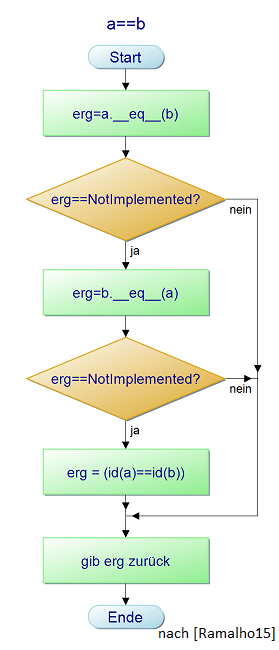

Dieses Verhalten nennt man **Rich Comparison**. Dies ist für alle Vergleichsoperatoren implementiert: zuerst wird der "forwards method call" ausgeführt, sofern dieser `NotImplemented` zurück gibt, der "reverse method call". Gibt dieser auch `NotImplemented` zurück, wird der Verlgeich mit einem als "fall back" spezifizierten Defaultverhalten ausgeführt:  

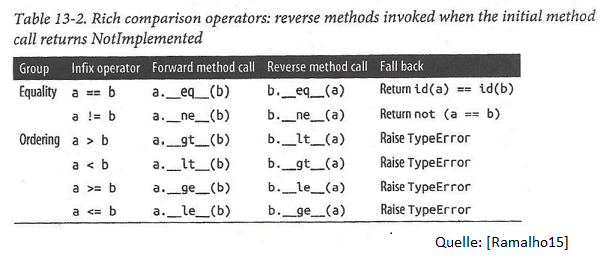

Da $a=b$ kommutativ ist, ist $a=b$ dasselbe wie $b=a$. Dies sollten auch implementierte Klassen beherzigen, daher ist es empfehlenswert, `NotImplemented` zurückzugeben für den Fall, dass ein bestimmter Vergleich mit Objekten einer bestimmten Klasse später einmal in einer anderen Klasse implementiert werden sollte. Dies wird im nächsten Abschnitt dargestellt.

## 4. Beispiel

Wir implementieren die Klasse `ZahlA` wie folgt:

In [ ]:
class ZahlA:
    def __init__(self,a):
        self.__zahl=a
    
    def getZahl(self):
        return self.__zahl
    
    def __str__(self):
        return str(self.__zahl)

Wenn wir Objekte dieser Klasse mit gleichen Werten erzeugen, sind sie nicht gleich. Nur bei gleicher Identität (`id()`) sind Objekte der Klasse `ZahlA` mit gleichen Attributwerten gleich:

In [ ]:
a=ZahlA(12)
b=ZahlA(12)
c=a
print(a==b)
print(a==c)

Um Objekte der Klasse `ZahlA` basierend auf dem Attributwert vergleichen zu können, implementieren wir die Methoden `__eq__()` und `__hash__()`.

In [ ]:
class ZahlA:
    def __init__(self,a):
        self.__zahl=a
    
    def getZahl(self):
        return self.__zahl
    
    def __eq__(self,other):
        if type(other)==ZahlA:
            if other.__zahl==self.__zahl:
                return True
            else:
                return False
        return False

    def __hash__(self):
        return hash(self.__zahl)
    
    def __str__(self):
        return str(self.__zahl)

In [ ]:
a=ZahlA(12)
b=ZahlA(12)
c=a
print(a==b)
print(a==c)

Nun implementieren wir eine zweite Klasse `ZahlB`, die sich ähnlich verhält:

In [ ]:
class ZahlB:
    def __init__(self,a):
        self.__zahl=a
    
    def getZahl(self):
        return self.__zahl
    
    def __eq__(self,other):
        if type(other)==ZahlB:
            if other.__zahl==self.__zahl:
                return True
            else:
                return False
        return False
    
    def __hash__(self):
        return hash(self.__zahl)
    
    def __str__(self):
        return str(self.__zahl)

Und wir erzeugen Objekte und vergleichen diese:

In [ ]:
zahlA1=ZahlA(12)
zahlA2=ZahlA(12)
zahlB1=ZahlB(12)
print('zahlA1==zahlA2:',zahlA1==zahlA2)
print('zahlA1==zahlB1:',zahlA1==zahlB1)

Nach einer Weile wird festgestellt, dass die Klasse `ZahlB` praktisch identisch ist mit der Klasse `ZahlA` und ein Vergleich basierend auf dem Attributwert möglich sein soll. Also wird in Klasse `ZahlB` die Implementation der Methode `__eq__()` angepasst. Diese ermöglicht nun den Vergleich mit einem Objekt der Klasse `ZahlA`. 

In [ ]:
class ZahlB:
    def __init__(self,a):
        self.__zahl=a
    
    def getZahl(self):
        return self.__zahl
    
    def __eq__(self,other):
        if type(other)==ZahlB:
            if other.__zahl==self.__zahl:
                return True
            else:
                return False
        # neuer Code
        elif type(other)==ZahlA:
            if other.getZahl()==self.__zahl:
                return True
            else:
                return False
        return False
    
    def __hash__(self):
        return hash(self.__zahl)
    
    def __str__(self):
        return str(self.__zahl)

Wieder erzeugen wir zwei Objekte:

In [ ]:
zahlA1=ZahlA(12)
zahlB1=ZahlB(12) 

Und testen die Implementation der Methode:

In [ ]:
print('zahlB1==zahlA1:',zahlB1==zahlA1)

Das Ergebnis sieht allerdings anders aus, wenn wir den Vergleich umgekehrt aufrufen!

In [ ]:
print('zahlB1==zahlA1:',zahlB1==zahlA1)
print('zahlA1==zahlB1:',zahlA1==zahlB1)

Ein Objekt der Klasse `ZahlA` kann nicht mit einem Objekt der Klasse `ZahlB` verglichen werden, die Methode `__eq__()` in `ZahlA` gibt `False` zurück. 

Dieses Verhalten widerspricht der Kommutativität von Equal (`==`) (also der Forderung, dass $a=b$ dasselbe ist wie $b=a$).

Wenn die Methode `__eq()__` in `ZahlA` nun allerdings `NotImplemented` statt `False`zurück gibt, wenn kein Vergleich mit einem anderen Datentyp vorgesehen ist, wird der "reverse method call" aufgerufen. In diesem Fall wird dann die Implementation der Methode `__eq__()` in Klasse `ZahlB` verwendet:

In [ ]:
class ZahlA:
    def __init__(self,a):
        self.__zahl=a
    
    def getZahl(self):
        return self.__zahl
    
    def __eq__(self,other):
        if type(other)==ZahlA:
            if other.__zahl==self.__zahl:
                return True
            else:
                return False
        # jetzt mit NotImplemented
        return NotImplemented
    
    def __hash__(self):
        return hash(self.__zahl)
    
    def __str__(self):
        return str(self.__zahl)

In [ ]:
zahlA1=ZahlA(12)
zahlB1=ZahlB(12) 
print('zahlB1==zahlA1:',zahlB1==zahlA1)
print('zahlA1==zahlB1:',zahlA1==zahlB1)

Durch die Verwendung von `NotImplemented` wird sichergestellt, dass der "reverse method call" ausgeführt wird. Hierdurch kann sichergestellt werden, dass `a==b` und `b==a` dasselbe Ergebnis haben.  

Wenn Sie erlauben, dass Objekte unterschiedlicher Klassen miteinander verglichen werden, empfehle ich, diesen Vergleich nur in einer Klasse zu implementieren. Sollten Sie etwas ändern (also zum Beispiel andere Attribute in den Vergleich einbeziehen wollen), müsste dies nur in einer Klasse implementiert werden. Dies setzt aber voraus, dass Sie `NotImplemented` verwenden.

**Quelle:**

[Ramalho15] Luciano Ramalho: Fluent Python, O'Reilly, 2015, 978-1-491-9-46008



*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.